# Written

## Problem 1

| X | Y |
| --- | --- |
| -1 | 0 |
| 0 | 2 |
| 1 | 4 |
| 2 | 5 |

We start with the understanding that the slope and intercept are calculated by $$w = (X^T X)^{-1} X^T Y$$ where X is equivalent to  $$\begin{bmatrix} 1 & -1 \\ 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix}$$

First, we need to find $X^T X$ and $X^T Y$ which we do by multiplying the matrices accordingly. This yields: $$X^T X = \begin{bmatrix} 1 & 1 & 1 & 1 \\ -1 & 0 & 1 & 2 \end{bmatrix} \begin{bmatrix} 1 & -1 \\ 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 4 & 2 \\ 2 & 6 \end{bmatrix}$$ and $$X^T Y = \begin{bmatrix} 1 & 1 & 1 & 1 \\ -1 & 0 & 1 & 2 \end{bmatrix} \begin{bmatrix} 0 \\ 2 \\ 4 \\ 5 \end{bmatrix} = \begin{bmatrix} 11 \\ 14 \end{bmatrix}$$

Finally, we need to find $(X^T X)^{-1}$. Fortunately a formula exists for a 2x2 matrix which is $$\begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1} = 1/(ad - bc)\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$ Putting $(X^T X)$ in we obtain: $$(X^T X)^{-1} = 1 / 20 \begin{bmatrix} 6 & -2 \\ -2 & 4 \end{bmatrix} = \begin{bmatrix} 0.3 & -0.1 \\ -0.1 & 0.2 \end{bmatrix}$$

Now putting it into the final formula we obtain: $$w = (X^T X)^{-1} X^T Y = \begin{bmatrix} 0.3 & -0.1 \\ -0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 11 \\ 14 \end{bmatrix} = \begin{bmatrix} 1.9 \\ 1.7 \end{bmatrix} $$

[0.2, 1.9, 3.6, 5.3]


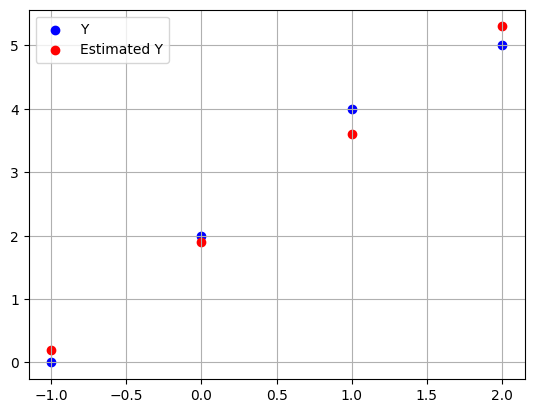

In [16]:
import matplotlib.pyplot as plt

X = [-1, 0, 1, 2]
Y = [0, 2, 4, 5]
regression_function = lambda x: round((x * 1.7) + 1.9, 2)
Yhat = list(map(regression_function, X))
print(Yhat)

fig, ax = plt.subplots()
ax.scatter(X, Y, c='blue', label='Y')
ax.scatter(X, Yhat, c='red', label='Estimated Y')

ax.legend()
ax.grid(True)

plt.show()

## Problem 2

The Mean Squared Error is found by $1/n \Sigma^{n}_{i=1} (y_i - \hat{y_i})^2$, and the Mean Absolute Error by $1/n \Sigma^{n}_{i=1} |y_i - \hat{y_i}|$

$ MSE = 1/n \Sigma^{n}_{i=1} (y_i - \hat{y_i})^2 = 1/4 ((0 - 0.2)^2 + (2 - 1.9)^2 + (4 - 3.6)^2 + (5 - 5.3)^2) = 1/4 (0.04 + 0.01 + 0.16 + 0.09) = 1/4 * 0.3 ~= 0.08 $

$ MAE = 1/n \Sigma^{n}_{i=1} |y_i - \hat{y_i}| = 1/4 (|0 - 0.2| + |2 - 1.9| + |4 - 3.6| + |5 - 5.3|) = 1/4 (0.2 + 0.1 + 0.4 + 0.3) = 1/4 * 1 = 0.25 $

## Problem 3

The bias and variance for this model are determined with equations $$ Bias = 1/n \Sigma^n_{i=1} (y - E(\hat{y}))^2 $$ and $$ Variance = 1/n \Sigma^n_{i=1} (\hat{y} - E(\hat{y}))^2 $$

First we need to find the value $ E(\hat{y}) $, which is: $$ E(\hat{y}) = 1/n \Sigma^n_{i=1} \hat{y} = 1/4 (0.2 + 1.9 + 3.6 + 5.3) = 1/4 * 11 = 11/4 $$

Using this we obtain values: $$ Bias = 1/n \Sigma^n_{i=1} (y - E(\hat{y}))^2 = 1/4 ((0 - 11/4)^2 + (2 - 11/4)^2 + (4 - 11/4)^2 + (5 - 11/4)^2) = 1/4 (7.5625 + 0.5625 + 1.5625 + 5.0625) = 1/4 * 14.75 = 3.69 $$ and $$ Variance = 1/n \Sigma^n_{i=1} (\hat{y} - E(\hat{y}))^2 = 1/4 ((0.2 - 11/4)^2 + (1.9 - 11/4)^2 + (3.6 - 11/4)^2 + (5.3 - 11/4)^2) = 1/4 (6.5025 + 0.7225 + 0.7225 + 6.5025) = 1/4 * 14.45 = 3.61 $$

# Programming

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Problem 1

In [2]:
df = pd.read_csv('./imports-85.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Problem 2

In [3]:
df = df[[9, 20, 16, 10, 11, 23]]
features_names = ['wheel-base', 'compression-ratio', 'engine-size', 'length', 'width']
target_names = ['city-mpg']
df.columns = features_names + target_names
df

,wheel-base,compression-ratio,engine-size,length,width,city-mpg
0,88.6,9.0,130,168.8,64.1,21
1,88.6,9.0,130,168.8,64.1,21
2,94.5,9.0,152,171.2,65.5,19
3,99.8,10.0,109,176.6,66.2,24
4,99.4,8.0,136,176.6,66.4,18
...,...,...,...,...,...,...
200,109.1,9.5,141,188.8,68.9,23
201,109.1,8.7,141,188.8,68.8,19
202,109.1,8.8,173,188.8,68.9,18
203,109.1,23.0,145,188.8,68.9,26


## Problem 3

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features_names], df[target_names], 
                                                        test_size=0.2, random_state=123)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, 
                                                        test_size=0.25, random_state=123)

## Problem 4

In [5]:
linear_regression_model = LinearRegression()
ridge_regression_model = Ridge()
lasso_regression_model = Lasso()

linear_regression_model.fit(X_train, Y_train)
ridge_regression_model.fit(X_train, Y_train)
lasso_regression_model.fit(X_train, Y_train)

linear_Y_valid = linear_regression_model.predict(X_valid)
ridge_Y_valid = ridge_regression_model.predict(X_valid)
lasso_Y_valid = lasso_regression_model.predict(X_valid)
linear_Y_test = linear_regression_model.predict(X_test)
ridge_Y_test = ridge_regression_model.predict(X_test)
lasso_Y_test = lasso_regression_model.predict(X_test)

In [6]:
linear_valid_MSE = mean_squared_error(Y_valid, linear_Y_valid)
linear_test_MSE = mean_squared_error(Y_test, linear_Y_test)
ridge_valid_MSE = mean_squared_error(Y_valid, ridge_Y_valid)
ridge_test_MSE = mean_squared_error(Y_test, ridge_Y_test)
lasso_valid_MSE = mean_squared_error(Y_valid, lasso_Y_valid)
lasso_test_MSE = mean_squared_error(Y_test, lasso_Y_test)

for name, score in zip(('linear_valid_MSE', 'linear_test_MSE', 'ridge_valid_MSE', 'ridge_test_MSE', 'lasso_valid_MSE', 'lasso_test_MSE'), (linear_valid_MSE, linear_test_MSE, ridge_valid_MSE, ridge_test_MSE, lasso_valid_MSE, lasso_test_MSE)):
    print(f'Score of {name}: {score}')

Score of linear_valid_MSE: 12.177721757411803
Score of linear_test_MSE: 10.524360977243502
Score of ridge_valid_MSE: 12.191103881525919
Score of ridge_test_MSE: 10.526304045031
Score of lasso_valid_MSE: 14.548321887484414
Score of lasso_test_MSE: 11.572907509236988


In [7]:
linear_valid_r2 = r2_score(Y_valid, linear_Y_valid)
linear_test_r2 = r2_score(Y_test, linear_Y_test)
ridge_valid_r2 = r2_score(Y_valid, ridge_Y_valid)
ridge_test_r2 = r2_score(Y_test, ridge_Y_test)
lasso_valid_r2 = r2_score(Y_valid, lasso_Y_valid)
lasso_test_r2 = r2_score(Y_test, lasso_Y_test)

for name, score in zip(('linear_valid_r2', 'linear_test_r2', 'ridge_valid_r2', 'ridge_test_r2', 'lasso_valid_r2', 'lasso_test_r2'), (linear_valid_r2, linear_test_r2, ridge_valid_r2, ridge_test_r2, lasso_valid_r2, lasso_test_r2)):
    print(f'Score of {name}: {score}')

Score of linear_valid_r2: 0.7112647708791611
Score of linear_test_r2: 0.6940254098452728
Score of ridge_valid_r2: 0.7109474791271253
Score of ridge_test_r2: 0.6939689190643875
Score of lasso_valid_r2: 0.6550575602575348
Score of lasso_test_r2: 0.6635410321164411


In [8]:
linear_valid_pearson = r2_score(Y_valid, linear_Y_valid) ** 0.5
linear_test_pearson = r2_score(Y_test, linear_Y_test) ** 0.5
ridge_valid_pearson = r2_score(Y_valid, ridge_Y_valid) ** 0.5
ridge_test_pearson = r2_score(Y_test, ridge_Y_test) ** 0.5
lasso_valid_pearson = r2_score(Y_valid, lasso_Y_valid) ** 0.5
lasso_test_pearson = r2_score(Y_test, lasso_Y_test) ** 0.5

for name, score in zip(('linear_valid_pearson', 'linear_test_pearson', 'ridge_valid_pearson', 'ridge_test_pearson', 'lasso_valid_pearson', 'lasso_test_pearson'), (linear_valid_pearson, linear_test_pearson, ridge_valid_pearson, ridge_test_pearson, lasso_valid_pearson, lasso_test_pearson)):
    print(f'Score of {name}: {score}')

Score of linear_valid_pearson: 0.8433651468250043
Score of linear_test_pearson: 0.8330818746349442
Score of ridge_valid_pearson: 0.843177015298167
Score of ridge_test_pearson: 0.8330479692457017
Score of lasso_valid_pearson: 0.8093562628765745
Score of lasso_test_pearson: 0.8145802797247433


## Problem 5

In [9]:
best_alpha_list = []
for model in (ridge_regression_model, lasso_regression_model):
    best_alpha = 0
    best_MSE = None
    for parameter_alpha in [0, 0.25, 0.5, 1, 1000]:
        model.alpha = parameter_alpha
        model.fit(X_train, Y_train)
        predicted_Y_valid = model.predict(X_valid)

        alpha_paramter_MSE = mean_squared_error(Y_valid, predicted_Y_valid)
        alpha_paramter_r2 = r2_score(Y_valid, predicted_Y_valid)
        alpha_paramter_pearson = r2_score(Y_valid, predicted_Y_valid) ** 0.5
        print(f'Performance for model {model}: MSE = {alpha_paramter_MSE} r2 = {alpha_paramter_r2} pearson = {alpha_paramter_pearson}')

        if not best_MSE or alpha_paramter_MSE < best_MSE:
            best_MSE = alpha_paramter_MSE
            best_alpha = parameter_alpha
    model.alpha = 1
    print(f'\nBest alpha is {best_alpha} for model {model} \n')
    best_alpha_list.append(best_alpha)

Performance for model Ridge(alpha=0): MSE = 12.177721757411794 r2 = 0.7112647708791613 pearson = 0.8433651468250044
Performance for model Ridge(alpha=0.25): MSE = 12.18107358633376 r2 = 0.711185298617351 pearson = 0.843318029344417
Performance for model Ridge(alpha=0.5): MSE = 12.184421241828694 r2 = 0.7111059253079912 pearson = 0.8432709679029577
Performance for model Ridge(alpha=1): MSE = 12.191103881525919 r2 = 0.7109474791271253 pearson = 0.843177015298167
Performance for model Ridge(alpha=1000): MSE = 15.878334803409444 r2 = 0.6235227960657385 pearson = 0.7896345965481366

Best alpha is 0 for model Ridge(alpha=1) 

Performance for model Lasso(alpha=0): MSE = 12.177721757411788 r2 = 0.7112647708791614 pearson = 0.8433651468250045
Performance for model Lasso(alpha=0.25): MSE = 12.87208867872418 r2 = 0.6948012487103254 pearson = 0.8335473884011187
Performance for model Lasso(alpha=0.5): MSE = 13.877796911636382 r2 = 0.6709557870678897 pearson = 0.8191189089917835
Performance for mode

C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\1897133538.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+02, tolerance: 5.273e-01 Linear regression models with null weight for

In [10]:
for model, best_alpha in zip((ridge_regression_model, lasso_regression_model), best_alpha_list):
    model.alpha = best_alpha
    model.fit(X_train, Y_train)
    predicted_Y_test = model.predict(X_test)
    
    alpha_paramter_MSE = mean_squared_error(Y_test, predicted_Y_test)
    alpha_paramter_r2 = r2_score(Y_test, predicted_Y_test)
    alpha_paramter_pearson = r2_score(Y_test, predicted_Y_test) ** 0.5
    print(f'Performance for model {model}: MSE = {alpha_paramter_MSE} r2 = {alpha_paramter_r2} pearson = {alpha_paramter_pearson}')

Performance for model Ridge(alpha=0): MSE = 10.524360977243527 r2 = 0.6940254098452721 pearson = 0.8330818746349437
Performance for model Lasso(alpha=0): MSE = 10.524360977243536 r2 = 0.6940254098452718 pearson = 0.8330818746349435


C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\763659106.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+02, tolerance: 5.273e-01 Linear regression models with null weight for 

## Problem 6

In [11]:
polynomial_transformer = PolynomialFeatures(5)
transformed_X_train = polynomial_transformer.fit_transform(X_train)
transformed_X_valid = polynomial_transformer.fit_transform(X_valid)
transformed_X_test = polynomial_transformer.fit_transform(X_test)

## Problem 7

In [12]:
best_alpha_list = []
for model in (ridge_regression_model, lasso_regression_model):
    best_alpha = 0
    best_MSE = None
    for parameter_alpha in [0, 0.25, 0.5, 1, 1000]:
        model.alpha = parameter_alpha
        model.fit(transformed_X_train, Y_train)
        predicted_Y_valid = model.predict(transformed_X_valid)

        alpha_paramter_MSE = mean_squared_error(Y_valid, predicted_Y_valid)
        alpha_paramter_r2 = r2_score(Y_valid, predicted_Y_valid)
        alpha_paramter_pearson = r2_score(Y_valid, predicted_Y_valid) ** 0.5
        print(f'Performance for model {model}: MSE = {alpha_paramter_MSE} r2 = {alpha_paramter_r2} pearson = {alpha_paramter_pearson}')

        if not best_MSE or alpha_paramter_MSE < best_MSE:
            best_MSE = alpha_paramter_MSE
            best_alpha = parameter_alpha
    model.alpha = 1
    print(f'\nBest alpha is {best_alpha} for model {model} \n')
    best_alpha_list.append(best_alpha)

#BTW one of the results for Ridge gives a prediction of -772 which is why the metrics are screwed up

C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\13936399.py:12: RuntimeWarning: invalid value encountered in double_scalars
  alpha_paramter_pearson = r2_score(Y_valid, predicted_Y_valid) ** 0.5
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\13936399.py:12: RuntimeWarning: invalid value encountered in double_scalars
  alpha_paramter_pearson = r2_score(Y_valid, predicted_Y_valid) ** 0.5
C:\Users\jaken\AppData\Local\Packages\Pyth

Performance for model Ridge(alpha=0): MSE = 15214.631664465465 r2 = -359.7407236870779 pearson = nan
Performance for model Ridge(alpha=0.25): MSE = 15214.631664465465 r2 = -359.7407236870779 pearson = nan
Performance for model Ridge(alpha=0.5): MSE = 15214.631664465465 r2 = -359.7407236870779 pearson = nan
Performance for model Ridge(alpha=1): MSE = 15214.631664465465 r2 = -359.7407236870779 pearson = nan
Performance for model Ridge(alpha=1000): MSE = 15214.631664465465 r2 = -359.7407236870779 pearson = nan

Best alpha is 0 for model Ridge(alpha=1) 

Performance for model Lasso(alpha=0): MSE = 9.119171865116272 r2 = 0.7837833520654962 pearson = 0.885315396943652


C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.600e+02, tolerance: 5.273e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Performance for model Lasso(alpha=0.25): MSE = 10.458951429331846 r2 = 0.7520170194828227 pearson = 0.8671891486191595
Performance for model Lasso(alpha=0.5): MSE = 10.647068384121877 r2 = 0.7475567441435742 pearson = 0.8646136386523025
Performance for model Lasso(alpha=1): MSE = 11.771306595946976 r2 = 0.7209009226242367 pearson = 0.8490588452069955
Performance for model Lasso(alpha=1000): MSE = 18.47295732848199 r2 = 0.562003987853279 pearson = 0.7496692523061613

Best alpha is 0 for model Lasso(alpha=1) 



C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.000e+02, tolerance: 5.273e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.484e+02, tolerance: 5.273e-01
  model = cd_fast.enet_coordinate_descent(


In [13]:
for model, best_alpha in zip((ridge_regression_model, lasso_regression_model), best_alpha_list):
    model.alpha = best_alpha
    model.fit(transformed_X_train, Y_train)
    predicted_Y_test = model.predict(transformed_X_test)
    
    alpha_paramter_MSE = mean_squared_error(Y_test, predicted_Y_test)
    alpha_paramter_r2 = r2_score(Y_test, predicted_Y_test)
    alpha_paramter_pearson = r2_score(Y_test, predicted_Y_test) ** 0.5
    print(f'Performance for model {model}: MSE = {alpha_paramter_MSE} r2 = {alpha_paramter_r2} pearson = {alpha_paramter_pearson}')
    # For if feature weights matter for Ridge and Lasso of Polynomial Features
    #print(f'Model {model} feature weights: {model.coef_}')

Performance for model Ridge(alpha=0): MSE = 377.8783950706255 r2 = -9.986052959420986 pearson = nan
Performance for model Lasso(alpha=0): MSE = 15.842480360824133 r2 = 0.5394118041067906 pearson = 0.7344465971783044


C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\909182821.py:8: RuntimeWarning: invalid value encountered in double_scalars
  alpha_paramter_pearson = r2_score(Y_test, predicted_Y_test) ** 0.5
C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\909182821.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(transformed_X_train, Y_train)
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

## Problem 8

In [14]:
#I'm assuming that we use the feature weights for the non-Polynomial Featured models since the features are not human understandable

#Using best alpha for previous question
ridge_regression_model.alpha = 0
lasso_regression_model.alpha = 0

ridge_regression_model.fit(X_train, Y_train)
lasso_regression_model.fit(X_train, Y_train)

print(ridge_regression_model.coef_)
print(lasso_regression_model.coef_)

[[ 0.38440687  0.60777563 -0.03302006 -0.37403792 -0.71525745]]
[ 0.38440687  0.60777563 -0.03302006 -0.37403792 -0.71525745]


C:\Users\jaken\AppData\Local\Temp\ipykernel_25700\3075239862.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regression_model.fit(X_train, Y_train)
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+02, tolerance: 5.273e-01 Linear regression models wit

Seeing the weights we can see that features 2 and 5 were the largest, meaning the width and compression ratio.
The smallest weight by far was for feature 3 engine size, being only -0.03302006